#  The Sparks Foundation | @ GRIPNovember 2022

 **DATA SCIENCE AND BUSINESS ANALYTICS TASKS**
 
 **TASK 5 - Exploratory Data Analysis - Sports (Indian Premier League)**

In [1]:
!pip install -U ppscore

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [3]:
!pip install pywaffle --quiet
from pywaffle import Waffle

import ppscore as pps

**INPUT DATA**

In [4]:
import os
os.getcwd()
os.chdir("D:\\ADDITIONAL LEARNING MATERIALS\\Data Analysis Projects\\Indian Premier League")

**EXPLORING THE DATA**

In [5]:
matches = pd.read_csv('matches.csv')
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [9]:
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [7]:
matches.shape

(756, 18)

In [8]:
deliveries.shape

(179078, 21)

In [9]:
matches.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [10]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [11]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [12]:
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

**DATA CLEANING**

In [13]:
# checking null values

matches.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [14]:
deliveries.isnull().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
dtype: bool

In [15]:
# drop unwanted columns

matches.drop(['umpire3'],axis=1, inplace=True)

In [16]:
# replace null values 

In [17]:
matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [18]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [19]:
matches.skew(axis=0)

id                2.011636
season            0.060337
dl_applied        6.079627
win_by_runs       2.551532
win_by_wickets    0.270236
dtype: float64

In [20]:
deliveries.skew(axis=0)

match_id           1.996381
inning             0.114825
over               0.049018
ball               0.096122
is_super_over     46.988051
wide_runs         11.663078
bye_runs          29.901004
legbye_runs       13.777287
noball_runs       24.483728
penalty_runs     299.228174
batsman_runs       1.582523
extra_runs         8.234163
total_runs         1.556933
dtype: float64

In [21]:
matches.duplicated().sum()

0

In [22]:
deliveries.duplicated().sum()

23

In [23]:
deliveries.drop_duplicates(inplace=True)

In [24]:
deliveries.shape

(179055, 21)

In [25]:
matches_n = matches.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(matches_n.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  5


In [26]:
deliveries_n = deliveries.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(deliveries_n.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  13


In [27]:
matches_cat = matches.select_dtypes(include = ['object'])
lstcatcolumns = list(matches_cat.columns.values)
print("Categorical Column = " ,lstcatcolumns)

Categorical Column =  ['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2']


In [28]:
deliveries_cat = deliveries.select_dtypes(include = ['object'])
del_cat_columns = list(deliveries_cat.columns.values)
print("Categorical Columns = ",del_cat_columns)

Categorical Columns =  ['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler', 'player_dismissed', 'dismissal_kind', 'fielder']


In [29]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

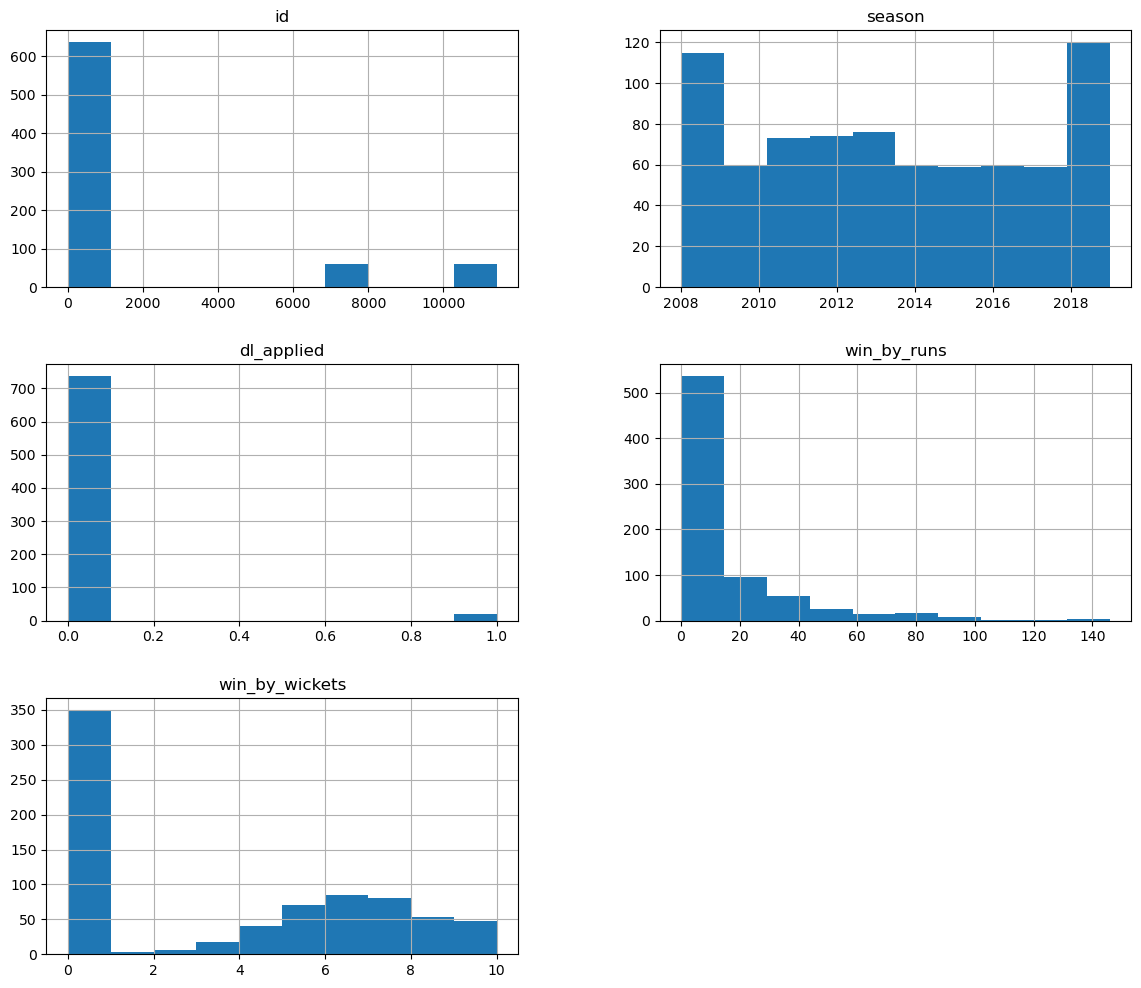

In [30]:
matches.hist(figsize=(14,12))
plt.show()

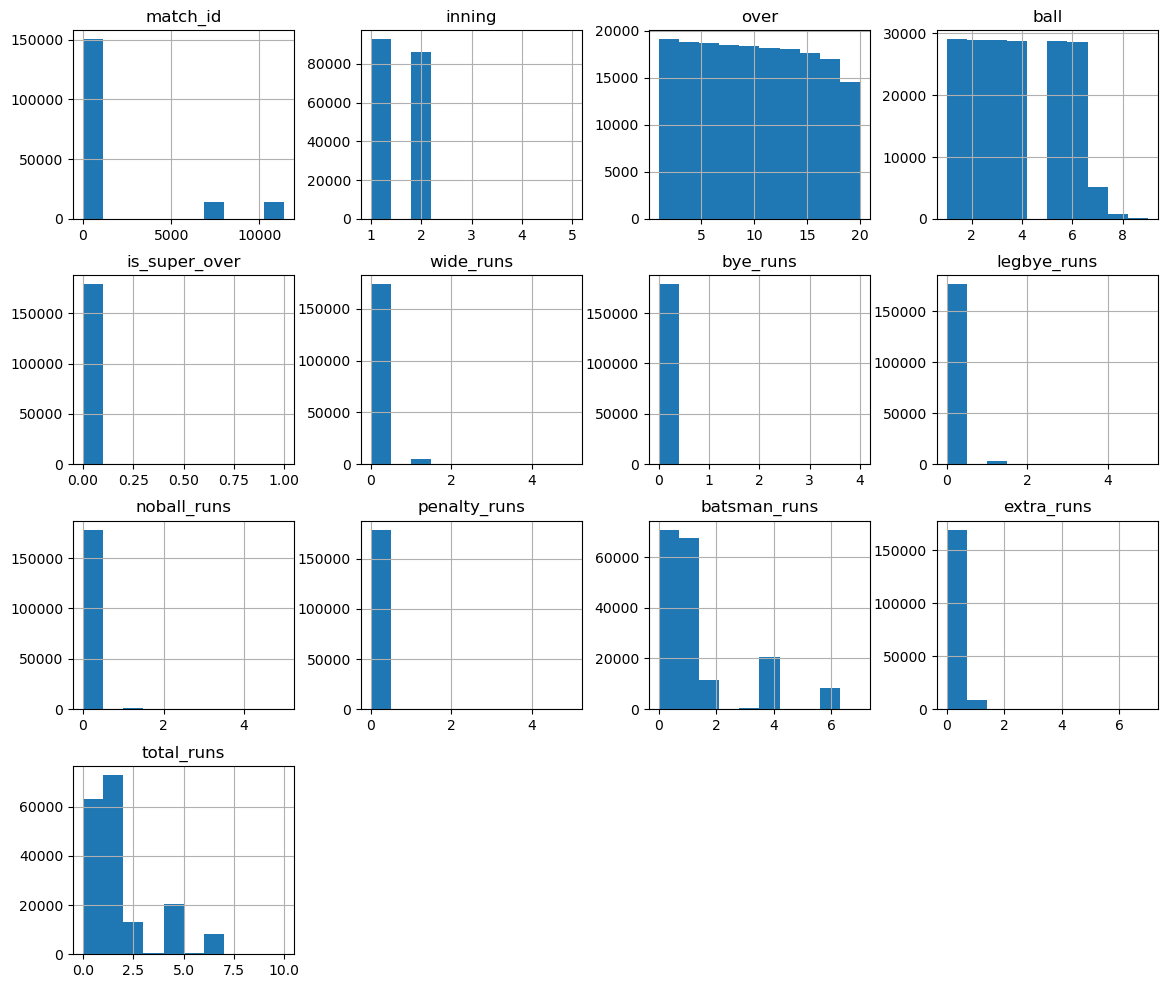

In [31]:
deliveries.hist(figsize=(14,12))
plt.show()

**DATA ANALYSIS THROUGH VISUALIZATION**

In [6]:
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = 8, 5
pd.options.plotting.backend = "plotly"

In [7]:
fig = matches.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Description of Data', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

In [10]:
plot = deliveries.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
plot.update_layout(title='Description of Data', xaxis_title='Variables', yaxis_title='Unique value count')
plot.show()

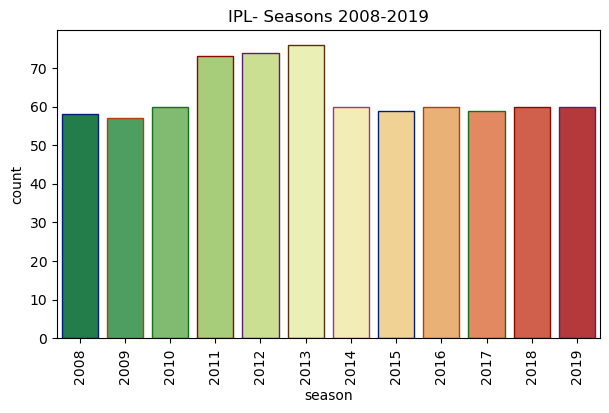

In [35]:
plt.subplots(figsize=(7,4))
sns.countplot('season',data=matches,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('IPL- Seasons 2008-2019')
plt.show()

CITY THAT HOSTED MORE NO OF MATCHES

In [37]:
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

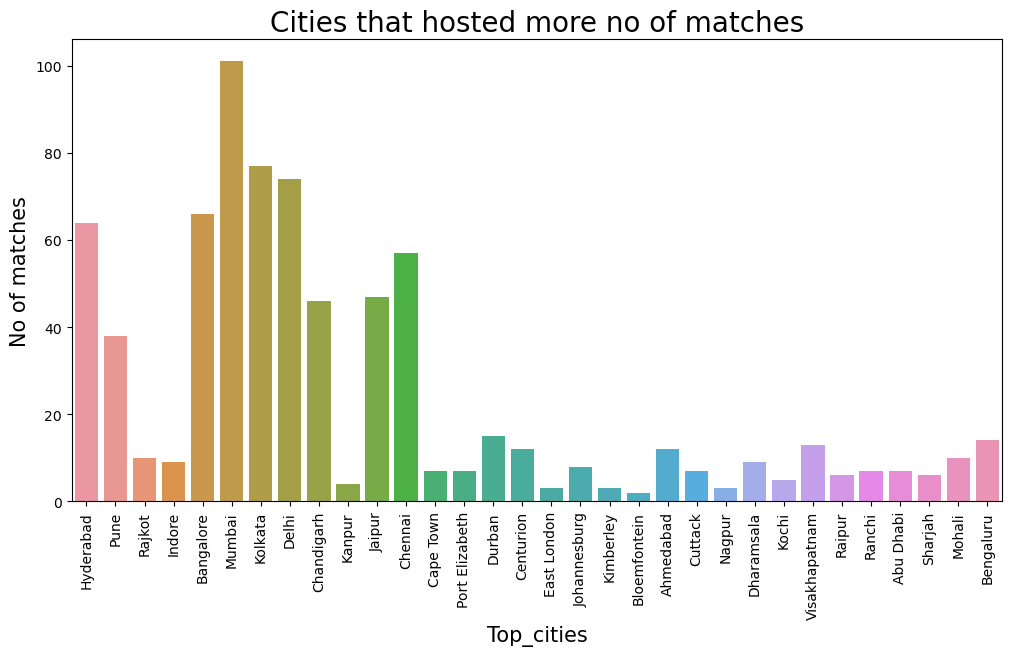

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x='city', data=matches)
plt.xlabel('Top_cities',size=15)
plt.ylabel('No of matches',size=15)
plt.title('Cities that hosted more no of matches',size=20)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
# most matches played with venue in the city

Venue_count = matches.groupby(['city'])['venue'].value_counts()
Venue_count

city            venue                                               
Abu Dhabi       Sheikh Zayed Stadium                                     7
Ahmedabad       Sardar Patel Stadium, Motera                            12
Bangalore       M Chinnaswamy Stadium                                   66
Bengaluru       M Chinnaswamy Stadium                                    7
                M. Chinnaswamy Stadium                                   7
Bloemfontein    OUTsurance Oval                                          2
Cape Town       Newlands                                                 7
Centurion       SuperSport Park                                         12
Chandigarh      Punjab Cricket Association Stadium, Mohali              35
                Punjab Cricket Association IS Bindra Stadium, Mohali    11
Chennai         MA Chidambaram Stadium, Chepauk                         49
                M. A. Chidambaram Stadium                                8
Cuttack         Barabati Stadiu

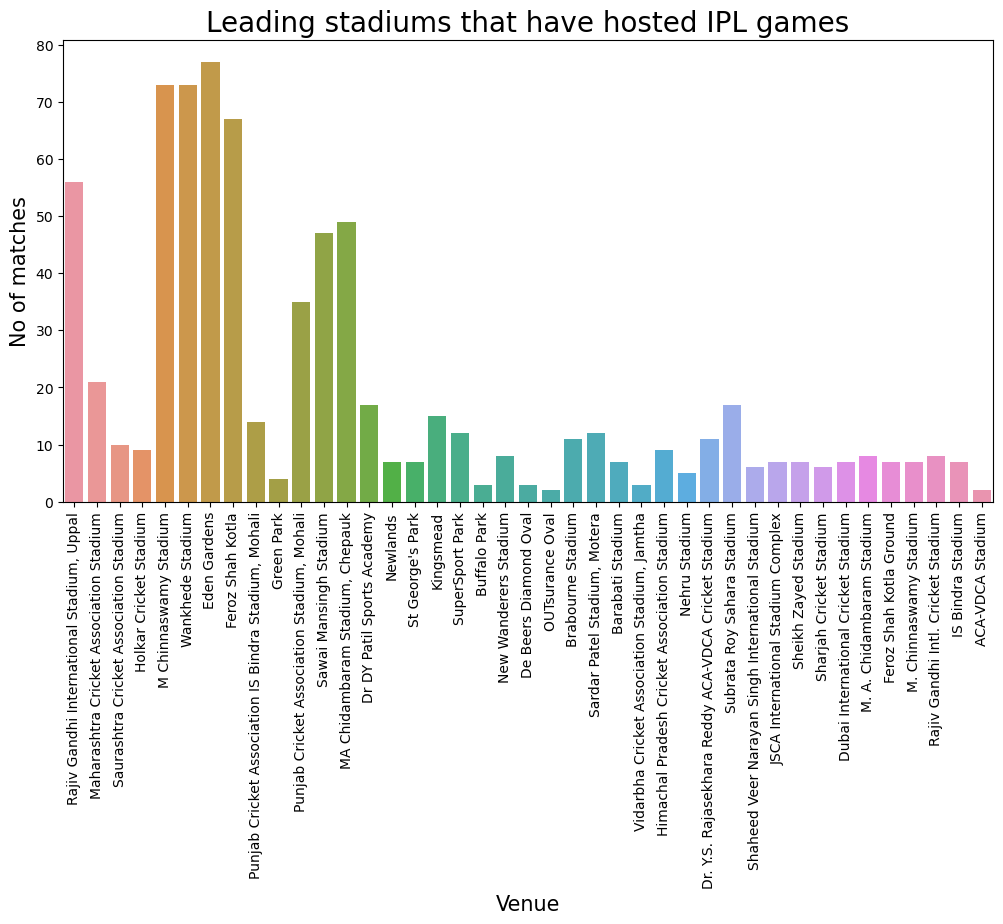

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches)
plt.xlabel('Venue',size=15)
plt.ylabel('No of matches',size=15)
plt.title('Leading stadiums that have hosted IPL games',size=20)
plt.xticks(rotation='vertical')
plt.show()

In [48]:
# team with toss wins
matches['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

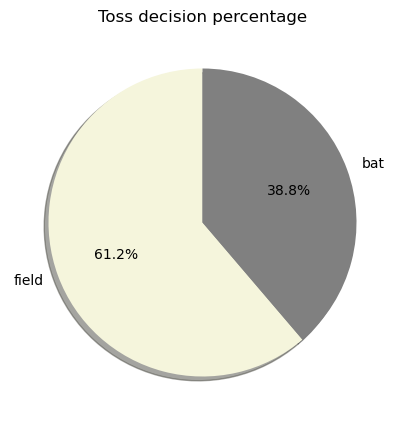

In [49]:
toss = matches.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
colors = ['beige', 'grey']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

In [11]:
plt = matches[['toss_winner', 'toss_decision']].copy()
plt['count'] = plt.groupby(['toss_winner', 'toss_decision'])['toss_decision'].transform('count')
plt = plt.drop_duplicates().reset_index(drop=True)
fig = plt.plot(kind='bar', x='toss_winner', y='count', color='toss_decision', barmode='group')
fig.update_layout(title='Decisions made by toss')
fig.show()

# 'Teams that have won most games'

In [51]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

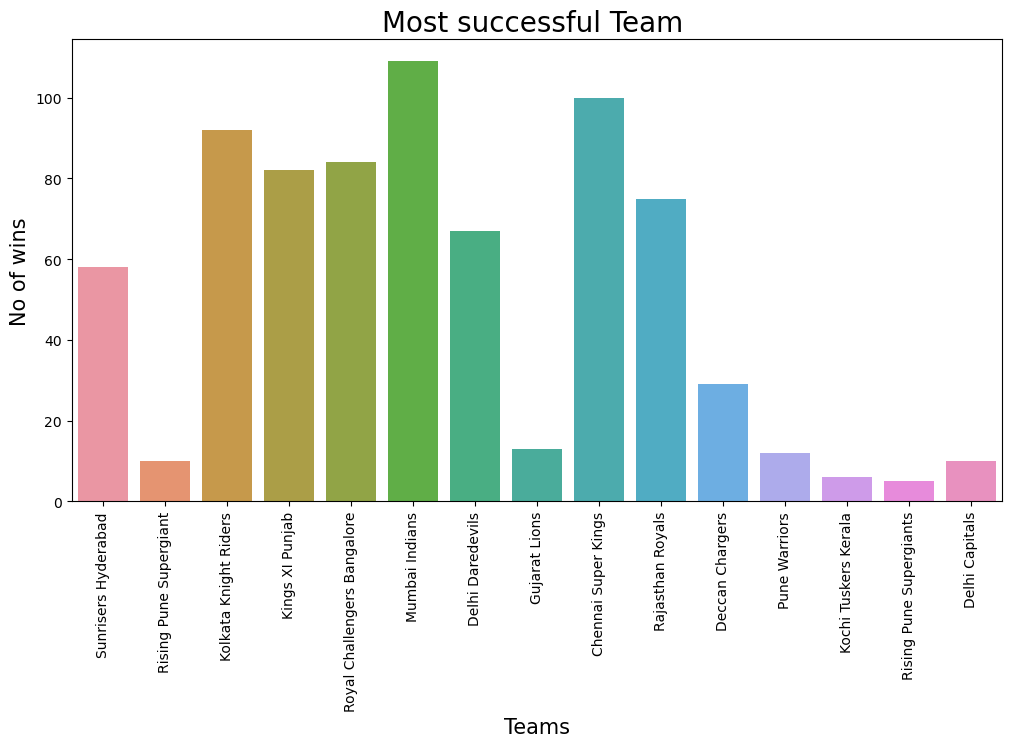

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=matches)
plt.xlabel('Teams',size=15)
plt.ylabel('No of wins',size=15)
plt.title('Most successful Team ',size=20)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
df = matches[['city','winner']].copy().dropna()
df['win_count'] = df.groupby(['city','winner'])['winner'].transform('count')
df = df.drop_duplicates().sort_values('win_count').tail(40)
fig = df.plot(kind='bar',x='winner',y='win_count',color='city')
fig.update_layout(title="Most successfull team along with cities")
fig.show()

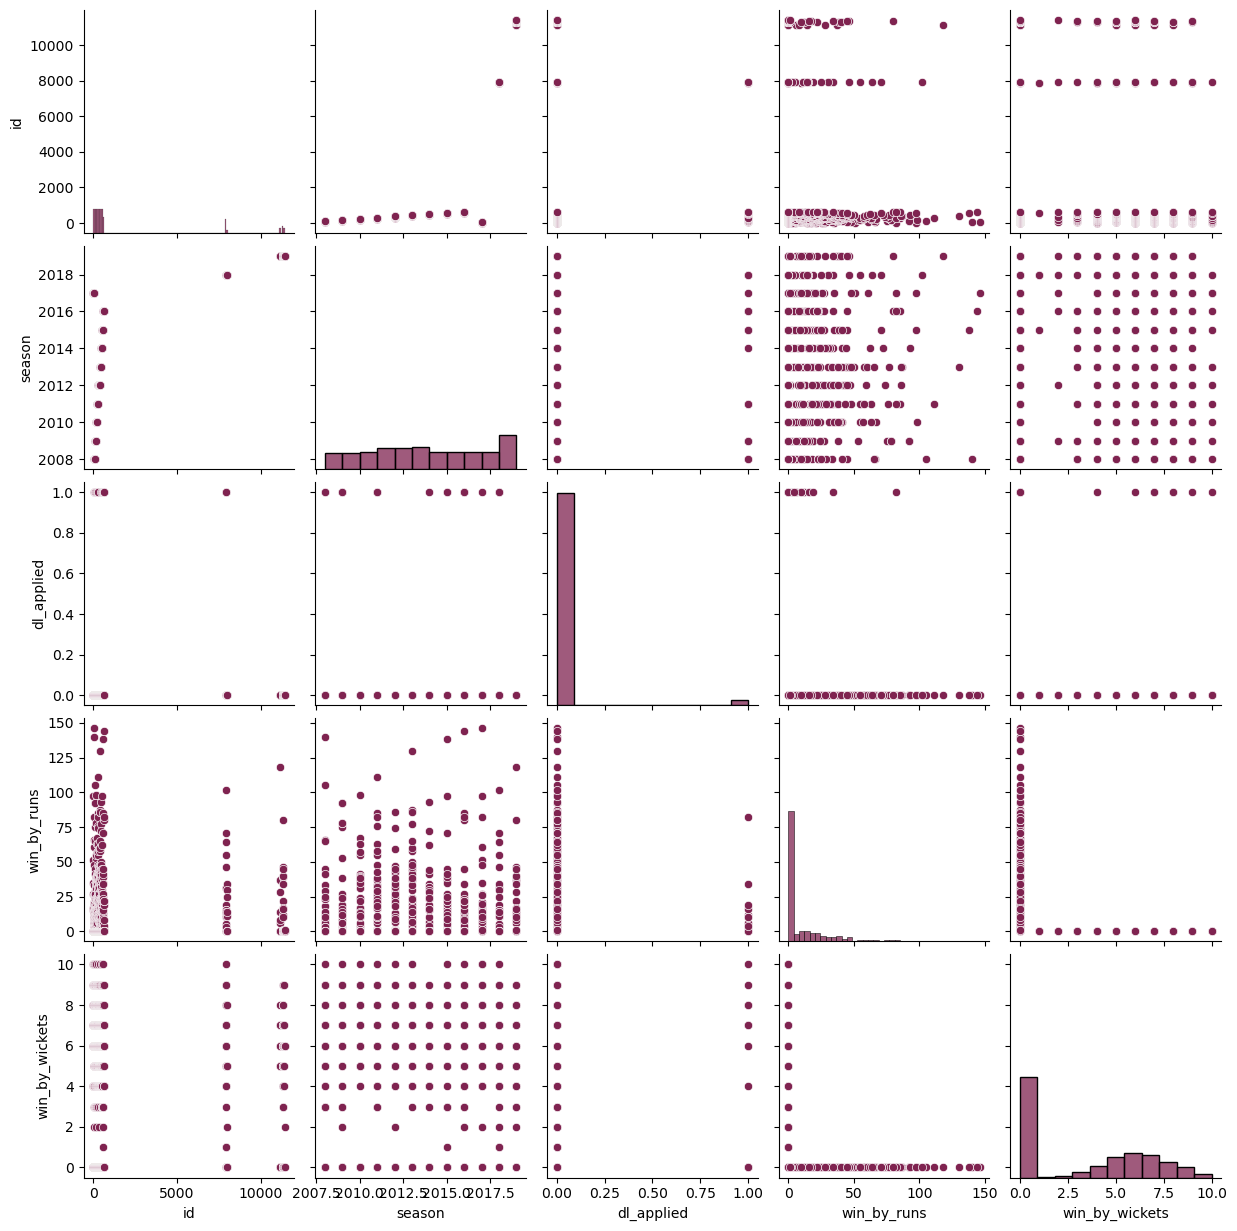

In [60]:
sns.set_palette('twilight_shifted_r')
sns.pairplot(matches);

PLAYER LEVEL ANALYSIS

In [61]:
# Total runs scored by batsman

deliveries.groupby(['batsman'])['batsman_runs'].agg({'sum'}).T

batsman  A Ashish Reddy  A Chandila  A Chopra  A Choudhary  A Dananjaya  \
sum                 280           4        53           25            4   

batsman  A Flintoff  A Hales  A Joseph  A Kumble  A Mishra  ...  Y Nagar  \
sum              62      152        15        35       368  ...      285   

batsman  Y Venugopal Rao  YA Abdulla  YK Pathan  YS Chahal  YV Takawale  \
sum                  985           0       3241         22          192   

batsman  Yashpal Singh  Younis Khan  Yuvraj Singh  Z Khan  
sum                 47            3          2765     117  

[1 rows x 516 columns]

In [62]:
batsmen = deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsmen_sorted = batsmen.sort_values(by='Runs',ascending=False)
top_batsmen = batsmen_sorted[:10]
print('Top 10 Batsmen in IPL are:\n',top_batsmen)

Top 10 Batsmen in IPL are:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4631
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4444
26   AB de Villiers  4428
147       G Gambhir  4223


In [13]:
df = deliveries[['batsman','batsman_runs']].copy().dropna()
df['Runs_count'] = df.groupby(['batsman','batsman_runs'])['batsman_runs'].transform('count')
df = df.drop_duplicates().sort_values('Runs_count').tail(40)
fig = df.plot(kind='bar',x='batsman',y='Runs_count',color='batsman')
fig.update_layout(title="Top 10 Batsmen in IPL- Seasons 2008-2019")
fig.show()

List of the Top 10 highest scorers in a match

In [17]:
batting=deliveries.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_sorted=batting.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_sorted[:10] 
batsman_ball_faced=deliveries.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')

batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,deliveries,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)

The Top 10 Batting Performances in the IPL History are:
             batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69             253.623188       1   
69      BB McCullum           158           77             205.194805       1   
146  AB de Villiers           133           61             218.032787       1   
207         RR Pant           130           64             203.125000       1   
271  AB de Villiers           129           53             243.396226       1   
324        CH Gayle           128           62             206.451613       1   
386         M Vijay           127           57             222.807018       1   
443       DA Warner           126           60             210.000000       1   
503        V Sehwag           122           62             196.774194       1   
565       SR Watson           121           60             201.666667       2   

                    batting_team                 bo

In [18]:
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt3 = px.bar(batsmen_innings_req_2, x='batsman', y='Strike Rate for Match',hover_data=['batsman'], 
             color='Strike Rate for Match',title='IPL Best batting performances in a Match')
plt3.show()

In [19]:
fig = px.bar(batsmen_innings_req_2, x='batsman', y='Innings Runs',
             hover_data=['batsman'], color='Innings Runs',title='IPL Best batting performances in a Match')
fig.show()

In [67]:
# Teams who had the most victories overall during the seasons

matches.groupby(['winner'])['win_by_runs'].agg({'sum'})

sum
winner                           
Chennai Super Kings          1778
Deccan Chargers               421
Delhi Capitals                 92
Delhi Daredevils              675
Gujarat Lions                   1
Kings XI Punjab               925
Kochi Tuskers Kerala           23
Kolkata Knight Riders        1086
Mumbai Indians               1866
Pune Warriors                 139
Rajasthan Royals              895
Rising Pune Supergiant        123
Rising Pune Supergiants        53
Royal Challengers Bangalore  1252
Sunrisers Hyderabad           713

In [20]:
df = matches[['winner','win_by_runs']].copy().dropna()
df['win_count'] = df.groupby(['winner','win_by_runs'])['winner'].transform('count')
df = df.drop_duplicates().sort_values('win_count').tail(40)
fig = df.plot(kind='bar',x='winner',y='win_count',color='winner')
fig.update_layout(title="Matches Won by Runs")
fig.show()

In [21]:
matches.groupby(['winner'])['win_by_wickets'].agg({'sum'})

sum
winner                          
Chennai Super Kings          289
Deccan Chargers               72
Delhi Capitals                29
Delhi Daredevils             275
Gujarat Lions                 65
Kings XI Punjab              268
Kochi Tuskers Kerala          30
Kolkata Knight Riders        351
Mumbai Indians               307
Pune Warriors                 36
Rajasthan Royals             273
Rising Pune Supergiant        31
Rising Pune Supergiants       20
Royal Challengers Bangalore  314
Sunrisers Hyderabad          173

In [30]:
df = matches[['winner','win_by_wickets']].copy().dropna()
df['win_count'] = df.groupby(['winner','win_by_wickets'])['winner'].transform('count')
df = df.drop_duplicates().sort_values('win_count').tail(40)
plt1 = df.plot(kind='bar',x='winner',y='win_count',color='winner')
plt1.update_layout(title="Matches Won by Wickets")
plt1.show()

Making a list of the top 10 wicket-takers among bowlers

In [23]:
wickets=deliveries[deliveries['dismissal_kind']!='run out']
bowling_total=wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_total.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('Top Wicket Takers in IPL are:\n',top_bowlers)

Top Wicket Takers in IPL are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


In [24]:
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')
fig.show()

In [73]:
match_bowling_tot=wickets.groupby(['match_id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['match_id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['match_id','bowler','Wickets']][0:10] 
match_bowling_runs=deliveries.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,deliveries,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',bowler_innings_req_2)

The Top 10 Batting Performances in the IPL History are:
               bowler  Wickets  Runs Conceeded  Runs per Wicket  inning  \
0            A Zampa        6              19         3.166667       1   
24          A Joseph        6              18         3.000000       2   
48     Sohail Tanvir        6              15         2.500000       1   
72        AS Rajpoot        5              16         3.200000       1   
96        SL Malinga        5              13         2.600000       1   
119          B Kumar        5              20         4.000000       2   
144         A Mishra        5              17         3.400000       2   
168  Harbhajan Singh        5              18         3.600000       2   
193         MM Patel        5              25         5.000000       1   
217       JD Unadkat        5              30         6.000000       2   

            batting_team             bowling_team  
0    Sunrisers Hyderabad  Rising Pune Supergiants  
24   Sunrisers Hyderabad

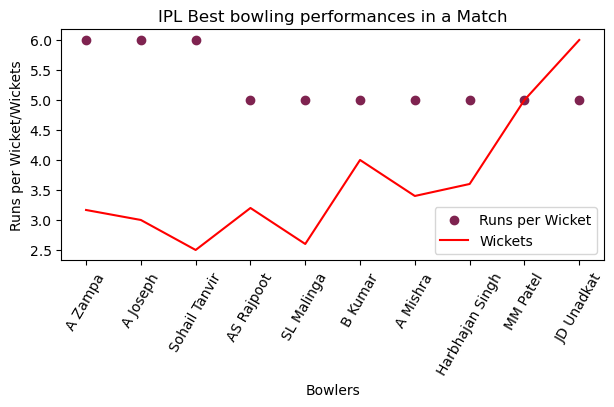

In [74]:
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']
plt.figure(figsize=(7,3))
plt.scatter(x,y1)
plt.plot(x,y2,'r')
plt.xlabel('Bowlers',size=10)
plt.ylabel('Runs per Wicket/Wickets',size=10)
plt.title('IPL Best bowling performances in a Match',size=12)
plt.xticks(rotation=60)
plt.legend(['Runs per Wicket','Wickets'],prop={'size':10});

In [25]:
fielder_list=deliveries.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
print('The Best Fielders(and WicketKeepers) in the Tornament are:\n',top_fielders)

The Best Fielders(and WicketKeepers) in the Tornament are:
             fielder  Dismissals
279        MS Dhoni         159
206      KD Karthik         152
372      RV Uthappa         125
412        SK Raina         115
19   AB de Villiers         114
313        PA Patel          97
355       RG Sharma          92
470         V Kohli          90
200      KA Pollard          85
484         WP Saha          82


In [26]:
plt4 = px.bar(top_fielders, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',title='Top 10 Fielders in IPL- Seasons 2008-2019')
plt4.show()

In [27]:
top_players = matches['player_of_match'].value_counts().reset_index()['index'].tolist()[:12]
top = matches[['winner','player_of_match']].dropna()
top['MOM_count'] = top.groupby(['winner','player_of_match'])['player_of_match'].transform('count')
top = top.drop_duplicates().reset_index(drop=True).sort_values('MOM_count')
top = top[top['player_of_match'].isin(top_players)]
plt3 = top.plot(kind='bar', x='player_of_match', y='MOM_count', color='winner')
plt3.update_layout(title='Players who have won most Man of the Match awards and their teams')
plt3.show()

Factors influencing win or loss

In [78]:
# find correlation coefficient of all variables

matches.corr()

id    season  dl_applied  win_by_runs  win_by_wickets
id              1.000000  0.668304   -0.011658    -0.039403       -0.012239
season          0.668304  1.000000   -0.001116    -0.037529       -0.009379
dl_applied     -0.011658 -0.001116    1.000000    -0.016349       -0.011631
win_by_runs    -0.039403 -0.037529   -0.016349     1.000000       -0.560420
win_by_wickets -0.012239 -0.009379   -0.011631    -0.560420        1.000000

In [79]:
corr=matches[['id','season','dl_applied','win_by_runs','win_by_wickets']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(5)

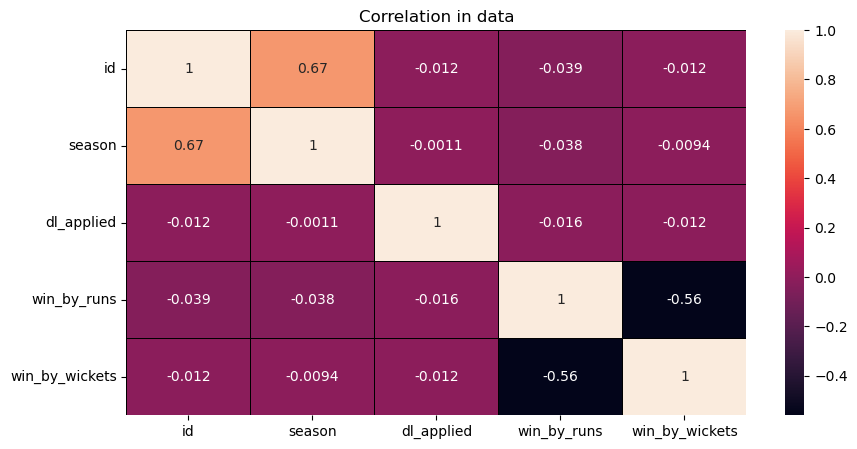

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(matches.corr(),annot=True,linewidth=0.5,linecolor="black")
plt.title('Correlation in data')
plt.show()

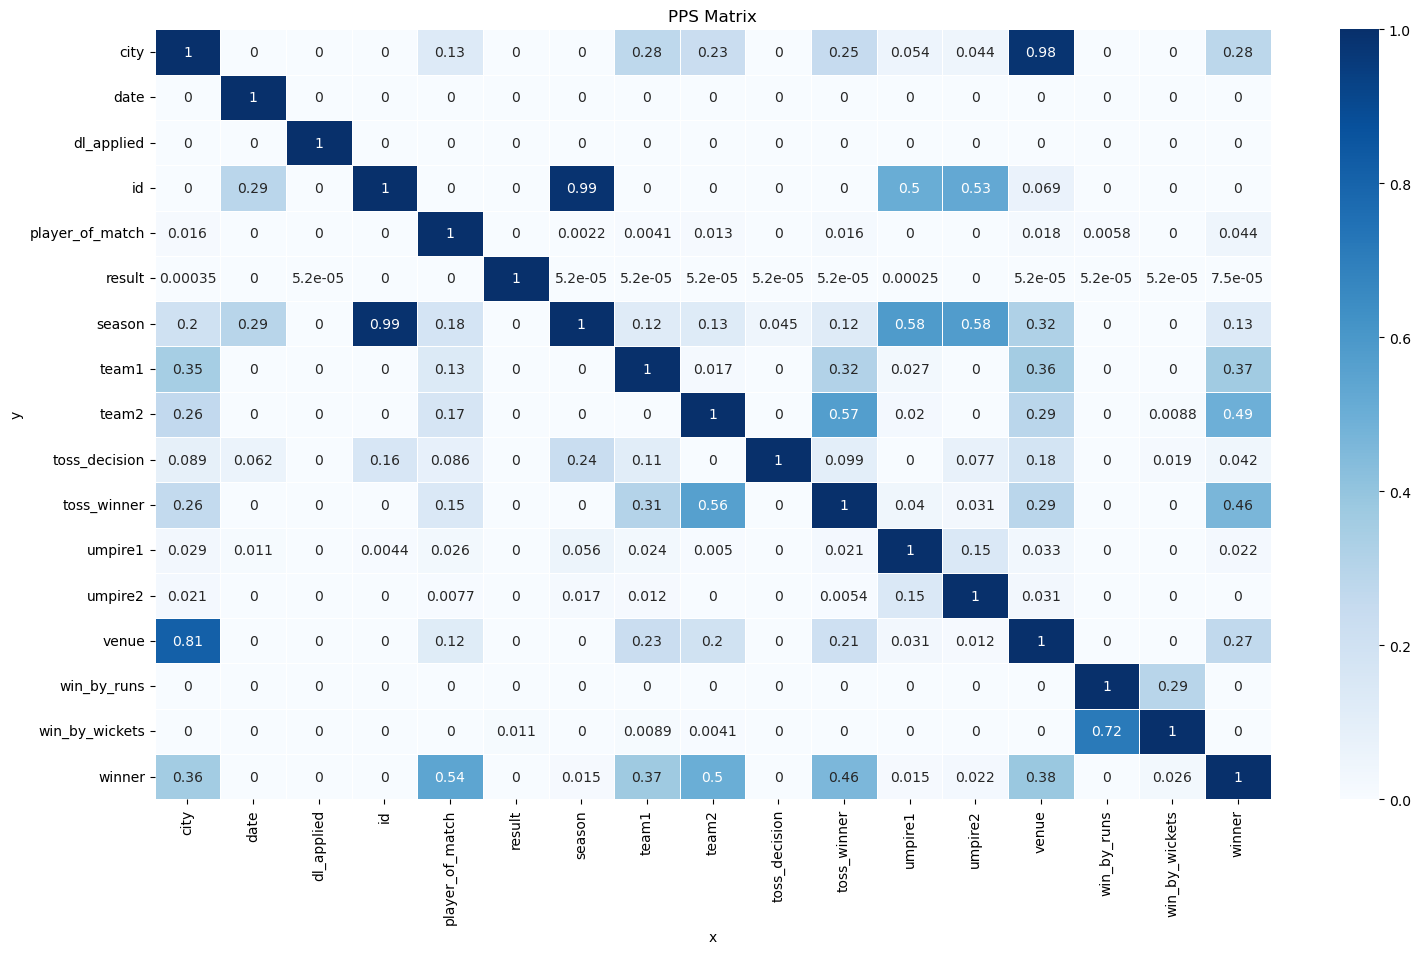

In [95]:
matrix_df = pps.matrix(matches)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(18,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('PPS Matrix')
plt.show()

In [81]:
deliveries.corr()

match_id    inning      over      ball  is_super_over  \
match_id       1.000000  0.004028  0.008450 -0.001441      -0.009147   
inning         0.004028  1.000000 -0.050118 -0.003933       0.084158   
over           0.008450 -0.050118  1.000000 -0.007428      -0.034333   
ball          -0.001441 -0.003933 -0.007428  1.000000      -0.001142   
is_super_over -0.009147  0.084158 -0.034333 -0.001142       1.000000   
wide_runs     -0.007507  0.001196 -0.010015 -0.004662      -0.001019   
bye_runs       0.000919 -0.000759  0.012109  0.006603       0.001353   
legbye_runs   -0.012480 -0.001972 -0.004817 -0.002794       0.001736   
noball_runs   -0.004606 -0.000906  0.016981  0.000568       0.013640   
penalty_runs  -0.001475  0.003442 -0.000979  0.000711      -0.000071   
batsman_runs   0.033606 -0.005378  0.086688  0.007949       0.010125   
extra_runs    -0.013312 -0.000522 -0.002520 -0.002611       0.003504   
total_runs     0.030825 -0.005499  0.086304  0.007406       0.010890   

               wide_runs  bye_runs  legbye_runs  noball_runs  penalty_runs  \
match_id       -0.007507  0.000919    -0.012480    -0.004606     -0.001475   
inning          0.001196 -0.000759    -0.001972    -0.000906      0.003442   
over           -0.010015  0.012109    -0.004817     0.016981     -0.000979   
ball           -0.004662  0.006603    -0.002794     0.000568      0.000711   
is_super_over  -0.001019  0.001353     0.001736     0.013640     -0.000071   
wide_runs       1.000000 -0.006197    -0.015854    -0.008676      0.012817   
bye_runs       -0.006197  1.000000    -0.004595    -0.002515     -0.000142   
legbye_runs    -0.015854 -0.004595     1.000000    -0.006434     -0.000362   
noball_runs    -0.008676 -0.002515    -0.006434     1.000000     -0.000198   
penalty_runs    0.012817 -0.000142    -0.000362    -0.000198      1.000000   
batsman_runs   -0.094586 -0.018938    -0.070113     0.004830     -0.002591   
extra_runs      0.720932  0.332359     0.554431     0.194903      0.057883   
total_runs      0.059075  0.051946     0.048065     0.046426      0.009755   

               batsman_runs  extra_runs  total_runs  
match_id           0.033606   -0.013312    0.030825  
inning            -0.005378   -0.000522   -0.005499  
over               0.086688   -0.002520    0.086304  
ball               0.007949   -0.002611    0.007406  
is_super_over      0.010125    0.003504    0.010890  
wide_runs         -0.094586    0.720932    0.059075  
bye_runs          -0.018938    0.332359    0.051946  
legbye_runs       -0.070113    0.554431    0.048065  
noball_runs        0.004830    0.194903    0.046426  
penalty_runs      -0.002591    0.057883    0.009755  
batsman_runs       1.000000   -0.114816    0.977278  
extra_runs        -0.114816    1.000000    0.098355  
total_runs         0.977278    0.098355    1.000000

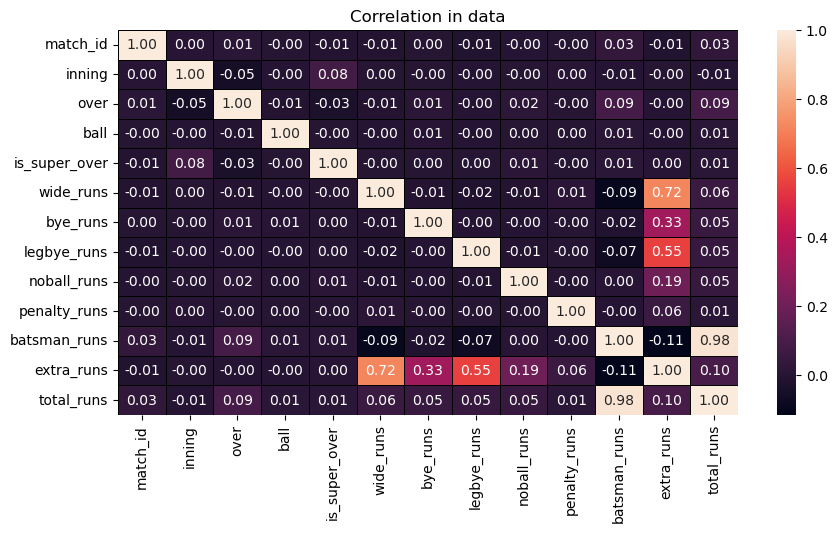

In [82]:
plt.figure(figsize=(10,5))
sns.heatmap(deliveries.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='0.2f')
plt.title('Correlation in data')
plt.show()

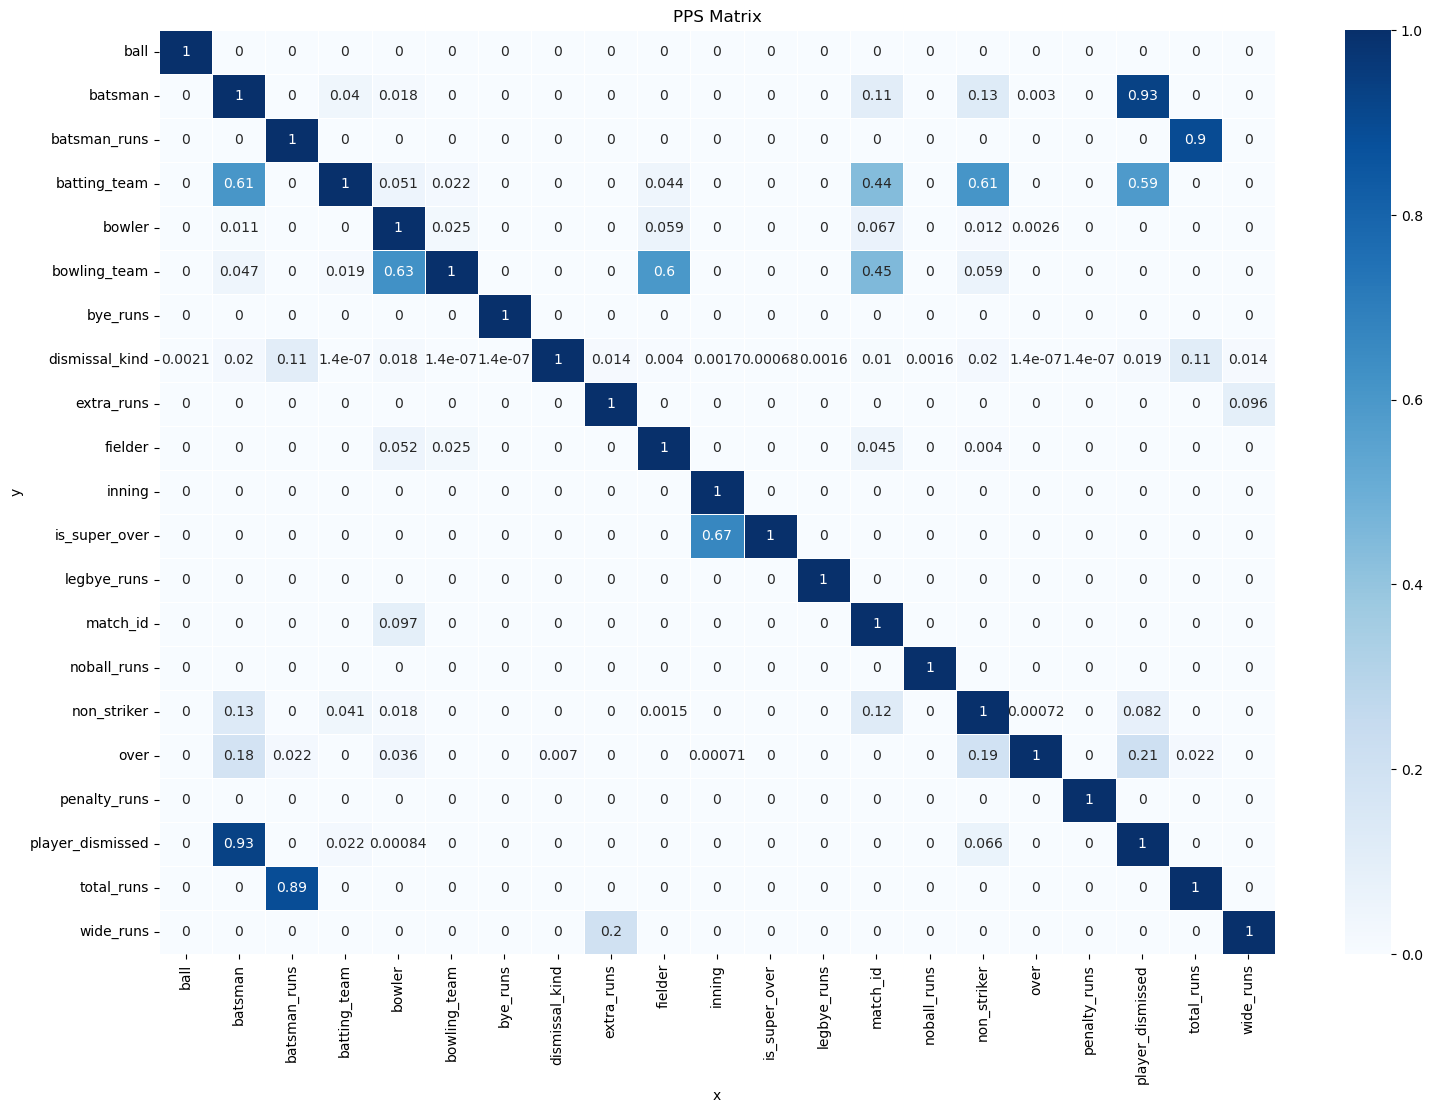

In [97]:
matrix_df = pps.matrix(deliveries)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(18,12))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title('PPS Matrix')
plt.show()

Matches played overall by each team

In [83]:
matches_played=pd.concat([matches['team1'],matches['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['Total_wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played.set_index('Team',inplace=True)
matches_played

Total Matches  Total_wins
Team                                                  
Mumbai Indians                         187         109
Royal Challengers Bangalore            180         100
Kolkata Knight Riders                  178          92
Kings XI Punjab                        176          84
Chennai Super Kings                    164          82
Delhi Daredevils                       161          75
Rajasthan Royals                       147          67
Sunrisers Hyderabad                    108          58
Deccan Chargers                         75          29
Pune Warriors                           46          13
Gujarat Lions                           30          12
Rising Pune Supergiant                  16          10
Delhi Capitals                          16          10
Kochi Tuskers Kerala                    14           6
Rising Pune Supergiants                 14           5

Each team's overall winnings

In [84]:
total_win_percentage = round(matches_played['Total_wins']/matches_played['Total Matches'],3)*100
total_win_percentage = total_win_percentage.to_frame().reset_index()
total_win_percentage.columns=['Team','Total_win_percentage']
total_win_percentage.set_index('Team',inplace=True)
total_win_percentage

Total_win_percentage
Team                                             
Mumbai Indians                               58.3
Royal Challengers Bangalore                  55.6
Kolkata Knight Riders                        51.7
Kings XI Punjab                              47.7
Chennai Super Kings                          50.0
Delhi Daredevils                             46.6
Rajasthan Royals                             45.6
Sunrisers Hyderabad                          53.7
Deccan Chargers                              38.7
Pune Warriors                                28.3
Gujarat Lions                                40.0
Rising Pune Supergiant                       62.5
Delhi Capitals                               62.5
Kochi Tuskers Kerala                         42.9
Rising Pune Supergiants                      35.7

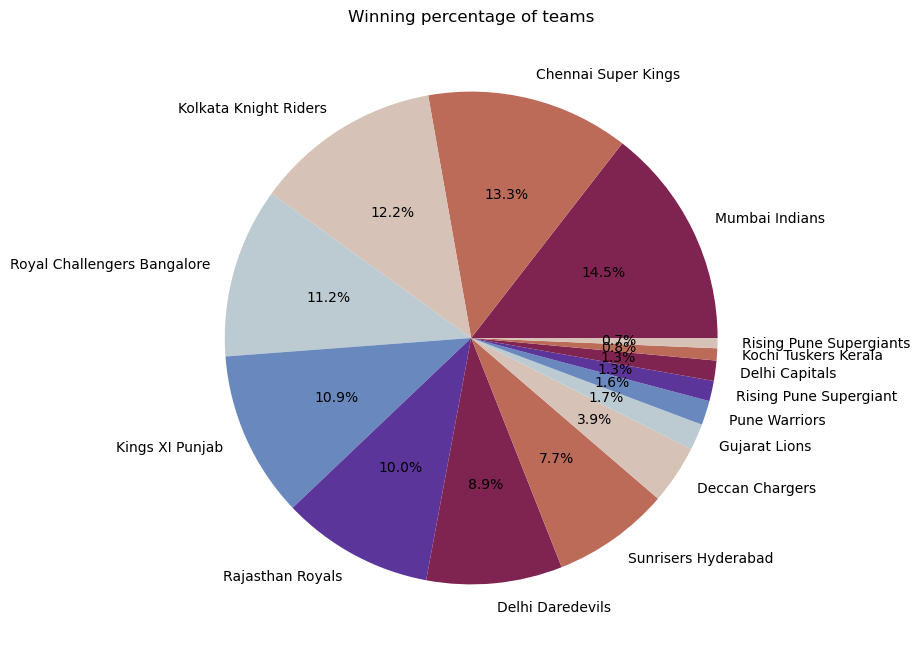

In [85]:
# pie chart
teams=matches['winner'].value_counts()
plt.figure(figsize=(10,8))
plt.title("Winning percentage of teams")
plt.pie(teams.values, labels=teams.index, autopct='%0.1f%%')
plt.show()

In [86]:
# Matches won by each team per season

teams_per_season = matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [87]:
# Matches won by teams per season

year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [89]:
win_per_season_df

year                   team wins
0  2008       Rajasthan Royals   13
0  2009       Delhi Daredevils   10
0  2010         Mumbai Indians   11
0  2011    Chennai Super Kings   11
0  2012  Kolkata Knight Riders   12
0  2013         Mumbai Indians   13
0  2014        Kings XI Punjab   12
0  2015    Chennai Super Kings   10
0  2016    Sunrisers Hyderabad   11
0  2017         Mumbai Indians   12
0  2018    Chennai Super Kings   11
0  2019         Mumbai Indians   11

In [28]:
df = deliveries[['batsman','batsman_runs']].copy().dropna()
df['Runs_count'] = df.groupby(['batsman','batsman_runs'])['batsman_runs'].transform('count')
df = df.drop_duplicates().sort_values('Runs_count').tail(40)
fig = df.plot(kind='bar',x='batsman',y='Runs_count',color='batsman')
fig.update_layout(title="Top 10 Batsmen in IPL- Seasons 2008-2019")
fig.show()

**CONCLUSION ::**

**Seasons:**
Compared to the prior seasons, 2011, 2012, and 2013 had the most matches.

**Top 5 Teams ::**

* Mumbai Indians (1st)

* Chennai Super Kings (2nd)

* Kolkata Knight Riders (3rd)

* Royal Challengers Bangalore (4th)

* Kings XI Punjab (5th)

In [29]:
top5_teams = ['Mumbai Indians','Chennai Super Kings','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']
df = matches[['season','winner']].copy().dropna()
df['win_count']=df.groupby(['season','winner'])['winner'].transform('count')
percentage = df.loc[:,["season","winner",'win_count']]
percentage = percentage.drop_duplicates()
percentage = percentage.loc[percentage['winner'].isin(top5_teams)]
percentage = percentage.sort_values("season")
plt = px.bar(percentage,x="winner",y="win_count", animation_frame="season",
            animation_group="winner",color="winner", hover_name="winner")
plt.update_layout(title="Top teams' wins per year",showlegend=False)
plt.show()

**Player who won most of the "Man of the Match" Awards : Chris Gayle**

**Players who scored most runs:** 

* V Kohli (1st)

* SK Raina (2nd)

* RG Sharma (3rd)

* DA Warner (4th)

* S Dhawan (5th)

**Dismissal Kind:**

Most dismissals are of the Caught type.

**Caught:**

* KD Karthik (1st)

* SK Raina (2nd)

* MS Dhoni (3rd)

* AB de Villiers (4th)

* RV Uthappa (5th)

**Wickets:**

* SL Malinga (1st)

* PP Chawla (2nd)

* SP Narine (3rd)

* B Kumar (4th)

* RA Jadeja (5th)

**Run-Out:**

* MS Dhoni (1st)

* RA Jadeja (2nd)

* V Kohli (3rd)

* SK Raina (4th)

* AB de Villiers (5th)

**Summary**

* The Top 10 run scorers list has featured Chris Gayle and AB de Villiers twice. When they both listed their Top   2 scores, which are in the Top 10 list of IPL History, they both represented RCB, helping the team to achieve   the Top 4 spots out of 10, followed by Chennai Super Kings with 2 spots. The fact that all bowling teams         against whom the highest scores in a game are obtained are different and consist of 4 Teams that have won the   IPL is a highly remarkable finding (Out of 5).

* Mumbai Indians is the team with the most players who have taken five or more wickets in a game. Sunrisers       Hyderabad is the team against which the most wickets (five) have been recorded. This is partially a result of   the Sunrisers team's current dearth of middle order batsmen.

* Since every team has the chance to play at least seven games on their home field, most teams have also           recorded the majority of their victories there. However, teams like the Mumbai Indians and the Chennai Super     Kings have excelled away from home as well. These teams have been the most successful in the history of the     IPL for a number of reasons, one of which is that.

**Teams & players a company should endorse for its products:**

**Teams :**

Mumbai Indians, Chennai Super Kings

**Players:**

Virat Kohli, Chris Gayle , Suresh Raina, MS Dhoni

